## Run MD with vanilla/og system and then check that difference in energies between vanilla vs hybrid system are close to 0

In [1]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt
import pickle

from simtk import openmm
from simtk.openmm import unit
import openmmtools
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache
from openmmtools.constants import kB

from perses.annihilation.lambda_protocol import RESTState, RESTCapableRelativeAlchemicalState, RESTCapableLambdaProtocol
from perses.dispersed import feptasks

import numpy as np

from perses.app.relative_point_mutation_setup import PointMutationExecutor


INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


## Generate htf

In [2]:
solvent_delivery = PointMutationExecutor("../../input/1brs_barstar_renumbered.pdb",
                        '1',
                        '42',
                        'ALA',
#                         ligand_input="../../input/1brs_barnase_renumbered.pdb",
                        forcefield_files=['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml'],
                        ionic_strength=0.05*unit.molar,
                        rest_radius=0.2,
                        generate_unmodified_hybrid_topology_factory=False,
                        generate_rest_capable_hybrid_topology_factory=True,
                        conduct_endstate_validation=False,
                       )

DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:setup:solvating at 0.05 M using tip3p
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:local_atom_map: {669: 669, 670: 670, 671: 671, 672: 672, 673: 673, 674: 676, 675: 677}
INFO:proposal_generator:the mapped atom names are: [('N', 'N'), ('CA', 'CA'), ('C', 'C'), ('O', 'O'), ('CB', 'CB'), ('H', 'H'), ('HA', 'HA')]
INFO:setup:Changed particle 201's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 201's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 231's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 231's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 307's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 307's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 486's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 486's sigma from 1.0 nm to 0.1

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 0.3934403300997135.
INFO:geometry:	reduced angle potential = 0.5684421563808242.
INFO:geometry:	reduced angle potential = 0.2613875598919042.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 733 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2628 angle forces in the no-nonbonded final system
INFO:geometry:	there are 4943 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.606655043375


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 10.320194074673378
INFO:geometry:final reduced energy 2677.9268488685475
INFO:geometry:sum of energies: 2677.9268491180487
INFO:geometry:magnitude of difference in the energies: 2.495010953396104e-07
INFO:geometry:Final logp_proposal: 20.29308198772691


conducting subsequent work with the following platform: CUDA
added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 1.3894169263932388), ('CustomTorsionForce', 0.027602853790119414), ('CustomBondForce', 8.90317429449002)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [674, 675, 681, 678, 680, 682, 679]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 735 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 2635 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 4973 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching functi

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1717867235443227.
INFO:geometry:	reduced angle potential = 0.15088552138282585.
INFO:geometry:	reduced angle potential = 2.0226598106735676e-06.
INFO:geometry:	reduced angle potential = 0.0014485627329499679.
INFO:geometry:	reduced angle potential = 6.103681872621702e-06.
INFO:geometry:	reduced angle potential = 8.429836390053187e-06.
INFO:geometry:	reduced angle potential = 0.0037318575268475676.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 735 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2635 angle forces in the no-nonbonde

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.6066550433757


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -60.958199568475365
INFO:geometry:final reduced energy 2606.648455666519
INFO:geometry:sum of energies: 2606.6484554749004
INFO:geometry:magnitude of difference in the energies: 1.9161880970841594e-07
INFO:geometry:Final logp_proposal: -7282.490340295291


conducting subsequent work with the following platform: CUDA
added energy components: [('CustomBondForce', 0.33407521838716286), ('CustomAngleForce', 1.7019045529067363), ('CustomTorsionForce', 10.252126980649416), ('CustomBondForce', -73.24630632041867)]


INFO:setup:charge diff: 0
INFO:relative:*** Generating RESTCapableHybridTopologyFactory ***
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:r_cutoff is 1.0 nm
INFO:relative:alpha_ewald is 2.7569734238004693
INFO:relative:w_scale is 0.1
INFO:relative:Creating hybrid system
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:Added MonteCarloBarostat.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=5.564, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=5.564, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=5.564), unit=nanometer)]
INFO:relative:

In [3]:
# pickle.dump(solvent_delivery.get_complex_htf(), open("bnbs_complex.pickle", "wb" ))
pickle.dump(solvent_delivery.get_apo_htf(), open("bnbs_apo.pickle", "wb" ))


In [9]:
old_system = solvent_delivery.get_apo_htf()._topology_proposal.old_system
hybrid_system = solvent_delivery.get_apo_htf().hybrid_system
for i in range(hybrid_system.getNumParticles()):
    if hybrid_system.getParticleMass(i) != old_system.getParticleMass(i):
        print(i, hybrid_system.getParticleMass(i), old_system.getParticleMass(i))

673 6.026000000000001 Da 9.018 Da


OpenMMException: Assertion failure at System.cpp:55.  Index out of range

In [11]:
htf = solvent_delivery.get_apo_htf()
new_system = htf._topology_proposal.new_system
hybrid_system = htf.hybrid_system
for i in htf._atom_classes['unique_new_atoms']:
#     if hybrid_system.getParticleMass(i) != new_system.getParticleMass(htf._hybrid_to_new_map[i]):
    print(i, hybrid_system.getParticleMass(i), new_system.getParticleMass(htf._hybrid_to_new_map[i]))

16044 4.0 Da 4.0 Da
16045 4.0 Da 4.0 Da
16046 4.0 Da 4.0 Da


## Test at lambda = 0

In [3]:
# htf = solvent_delivery.get_apo_htf()
with open("bnbs_apo.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [4]:
htf.hybrid_system.getForces()


[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2ad9d8512cf0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2ad9d8512930> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2ad9d8512990> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2ad9dd4890c0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2ad9dd4891e0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2ad9dd489270> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2ad9dd489300> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2ad9dd489390> >]

In [5]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
1.0
0.0


In [6]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [7]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [8]:
# Run MD
hybrid = list()
hybrid_states = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    state = context.getState(getPositions=True, enforcePeriodicBox=False)
    hybrid_states.append(state)
#     pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
#     hybrid.append(pos)


/scratch/lsftmp/4137623.tmpdir/ipykernel_50481/3798079088.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
# with open("hybrid_positions_bnbs.pickle", "wb") as f:
#     pickle.dump(hybrid, f)
with open("hybrid_states_bnbs.pickle", "wb") as f:
    pickle.dump(hybrid_states, f)
    

In [9]:
# with open("hybrid_positions_bnbs.pickle", "rb") as f:
#     hybrid = pickle.load(f)
with open("hybrid_states_bnbs.pickle", "rb") as f:
    hybrid_states = pickle.load(f)
    

In [11]:
# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.old_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)


# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 2 
torsion_force_index = 3 
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = True
hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx, idx in hybrid_to_bond_indices.items():
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-2] *= 0 # zero K_old
    hybrid_params[-1] *= 0 # zero K_new
    custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx, idx in hybrid_to_angle_indices.items():
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx, idx in hybrid_to_torsion_indices.items():
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)

# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for state in tqdm_notebook(hybrid_states):
   
#     context_og.setPositions(htf.old_positions(pos))
    context_og.setPositions(htf.old_positions(state.getPositions(asNumpy=True)))
    context_og.setPeriodicBoxVectors(*state.getPeriodicBoxVectors())
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
#     context_hybrid.setPositions(pos)
    context_hybrid.setState(state)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4137623.tmpdir/ipykernel_50481/383744331.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for state in tqdm_notebook(hybrid_states):


  0%|          | 0/500 [00:00<?, ?it/s]

-225707.29093947378 kJ/mol -225707.29827102934 kJ/mol
-217894.430565133 kJ/mol -217894.50039114026 kJ/mol
-214527.32349696057 kJ/mol -214527.3308190178 kJ/mol
-212351.0803639684 kJ/mol -212351.11893379447 kJ/mol
-211657.62557602278 kJ/mol -211657.632889144 kJ/mol
-211197.02893887437 kJ/mol -211197.06749986892 kJ/mol
-211361.3735972594 kJ/mol -211361.36528212533 kJ/mol
-210164.7485972594 kJ/mol -210164.75590712533 kJ/mol
-210084.05474009388 kJ/mol -210084.06204970565 kJ/mol
-210764.65109590837 kJ/mol -210764.6740291048 kJ/mol
-210997.49718633713 kJ/mol -210997.5201176616 kJ/mol
-211018.87218633713 kJ/mol -211018.8794926616 kJ/mol
-211034.18468633713 kJ/mol -211034.2232426616 kJ/mol
-211170.62218633713 kJ/mol -211170.6607426616 kJ/mol
-211914.41496291873 kJ/mol -211914.42226805259 kJ/mol
-211809.2473836795 kJ/mol -211809.2546892041 kJ/mol
-211504.10481117456 kJ/mol -211504.1121154217 kJ/mol
-210580.776834331 kJ/mol -210580.784138014 kJ/mol
-210558.221268086 kJ/mol -210558.2754463945 kJ/m

-210969.5975634877 kJ/mol -210969.60486382496 kJ/mol
-211890.57484152843 kJ/mol -211890.644640962 kJ/mol
-211777.41973159835 kJ/mol -211777.42703224538 kJ/mol
-211601.98546246532 kJ/mol -211602.02401296803 kJ/mol
-211509.67231762712 kJ/mol -211509.74211850148 kJ/mol
-211664.42828566604 kJ/mol -211664.4355854236 kJ/mol
-212474.8431030251 kJ/mol -212474.88165273596 kJ/mol
-211861.9363247319 kJ/mol -211862.00612257194 kJ/mol
-211763.81647384702 kJ/mol -211763.839398313 kJ/mol
-211835.54438375006 kJ/mol -211835.61418196923 kJ/mol
-211604.9363629287 kJ/mol -211604.91241431082 kJ/mol
-211547.2589610368 kJ/mol -211547.28188915658 kJ/mol
-210670.3604944339 kJ/mol -210670.35217202175 kJ/mol
-211719.14862300432 kJ/mol -211719.218425946 kJ/mol
-210349.33612300432 kJ/mol -210349.390300946 kJ/mol
-211453.58940607263 kJ/mol -211453.6279582701 kJ/mol
-210883.77690607263 kJ/mol -210883.7998332701 kJ/mol
-210752.7455988878 kJ/mol -210752.76852701383 kJ/mol
-210757.8705988878 kJ/mol -210757.92477701383 

-210694.58000462432 kJ/mol -210694.6185542839 kJ/mol
-211217.08000462432 kJ/mol -211217.1341792839 kJ/mol
-211724.2284648649 kJ/mol -211724.25138931395 kJ/mol
-211204.05624802643 kJ/mol -211204.12604695425 kJ/mol
-211125.21839681268 kJ/mol -211125.21007306591 kJ/mol
-211339.84339681268 kJ/mol -211339.88194806591 kJ/mol
-211555.76064067404 kJ/mol -211555.79919127945 kJ/mol
-211640.58643917576 kJ/mol -211640.62499208876 kJ/mol
-211418.1476413817 kJ/mol -211418.12369363842 kJ/mol
-211345.7122023697 kJ/mol -211345.75075373997 kJ/mol
-210955.27414540248 kJ/mol -210955.2814465729 kJ/mol
-212025.64914540248 kJ/mol -212025.6876965729 kJ/mol
-211389.91922980105 kJ/mol -211389.8952806196 kJ/mol
-211855.928905827 kJ/mol -211855.87370624123 kJ/mol
-212338.1830273848 kJ/mol -212338.19032634047 kJ/mol
-211259.1630843256 kJ/mol -211259.1703838331 kJ/mol
-212130.10802994552 kJ/mol -212130.11532759288 kJ/mol
-212869.35802994552 kJ/mol -212869.36532759288 kJ/mol
-212678.85802994552 kJ/mol -212678.865327

-211388.2897921463 kJ/mol -211388.29709285256 kJ/mol
-211931.58342788857 kJ/mol -211931.57510266095 kJ/mol
-211054.29517426528 kJ/mol -211054.34934991196 kJ/mol
-211427.40135024628 kJ/mol -211427.45552535896 kJ/mol
-211855.78958040383 kJ/mol -211855.79688013907 kJ/mol
-211565.2441385095 kJ/mol -211565.2514393796 kJ/mol
-210882.36748072226 kJ/mol -210882.40603099315 kJ/mol
-211231.5839820532 kJ/mol -211231.622532825 kJ/mol
-211626.7714820532 kJ/mol -211626.794407825 kJ/mol
-211037.19428056222 kJ/mol -211037.17033159785 kJ/mol
-211088.3803564408 kJ/mol -211088.40328239146 kJ/mol
-211262.2553564408 kJ/mol -211262.32515739146 kJ/mol
-211820.6283514672 kJ/mol -211820.71377667604 kJ/mol
-211413.59942525555 kJ/mol -211413.6692251063 kJ/mol
-210989.02696089982 kJ/mol -210989.08113418406 kJ/mol
-211031.11583563336 kJ/mol -211031.13876010533 kJ/mol
-211136.14930856903 kJ/mol -211136.21910922526 kJ/mol
-211559.21180856903 kJ/mol -211559.21910922526 kJ/mol
-211778.76817967836 kJ/mol -211778.775480

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

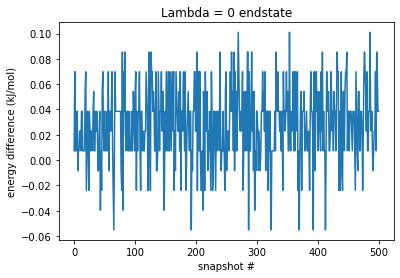

In [12]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference (kJ/mol)")
plt.xlabel("snapshot #")
plt.title("Lambda = 0 endstate")
plt.show()

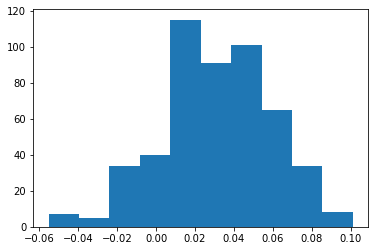

In [13]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [14]:
np.mean(np.array(energies_og) - np.array(energies_hybrid))

0.02786370110907592

In [15]:
np.std(np.array(energies_og) - np.array(energies_hybrid))

0.03060316381820711

In [18]:
for i, (energy_og, energy_hybrid) in enumerate(zip(energies_og, energies_hybrid)):
    if energy_og - energy_hybrid > 0.15:
        print(i, energy_og - energy_hybrid, energy_og, energy_hybrid)

40 0.3823354759369977 408235.66180068 408235.27946520405
41 0.41358547587879 1060803.41180068 1060802.998215204
55 0.9135854756459594 5750468.91180068 5750467.998215204
75 0.47608547587879 915989.41180068 915988.9357152041
120 0.16358547587879002 1720692.66180068 1720692.498215204
149 1.78858547587879 1048467.16180068 1048465.3732152041
152 1.78858547587879 1700591.41180068 1700589.623215204
155 0.72608547587879 622109.41180068 622108.6857152041
167 0.4135854759369977 92604.16180067998 92603.74821520405
175 0.6635854756459594 2395801.4118006798 2395800.748215204
176 0.4135854756459594 3043310.6618006798 3043310.248215204
185 0.5698354759369977 427130.53680068 427129.96696520405
202 0.6635854756459594 2248677.9118006798 2248677.248215204
207 0.47608547587879 719591.91180068 719591.4357152041
212 529.4135854840279 399280815.4118007 399280285.9982152
214 5.663585475645959 2569485.9118006798 2569480.248215204
220 0.22608547593699768 292959.66180068 292959.43571520405
226 0.3823354759369977

In [19]:
with open("energies_bnbs_hybrid.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_bnbs_og.pickle", "wb") as f:
    pickle.dump(energies_og, f)